In [33]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

C:\Users\User\AppData\Local\Temp\ipykernel_38732\3627378892.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([x[3, 0], x[3, 0] + d[4] * np.cos(np.sum(phi))], [x[3, 1], x[3, 1] + d[4] * np.sin(np.sum(phi))], 'co-')  # Pole 5


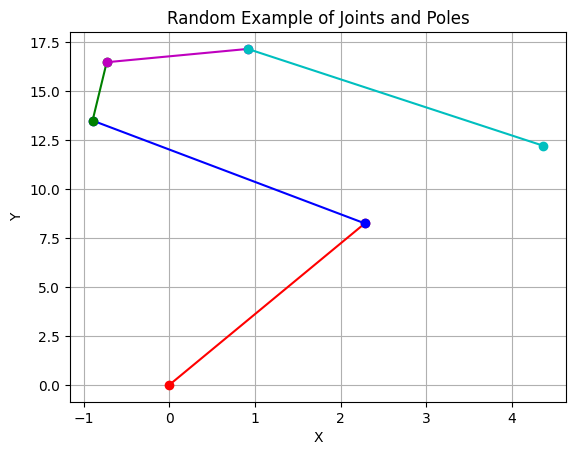

In [34]:

def visualize_random_example(df):
    # Select a random example from the DataFrame
    random_example = df.sample(1).iloc[0]
    
    # Extract joint positions
    x = np.array([random_example[f'x{i+1}_{j+1}'] for i in range(4) for j in range(2)]).reshape(4, 2)
    
    # Extract lengths and angles
    d = random_example[['d1', 'd2', 'd3', 'd4', 'd5']]
    phi = random_example[['phi1', 'phi2', 'phi3', 'phi4']]
    
    # Plot the joints and poles
    fig, ax = plt.subplots()
    ax.plot([0, x[0, 0]], [0, x[0, 1]], 'ro-')  # Pole 1
    ax.plot([x[0, 0], x[1, 0]], [x[0, 1], x[1, 1]], 'bo-')  # Pole 2
    ax.plot([x[1, 0], x[2, 0]], [x[1, 1], x[2, 1]], 'go-')  # Pole 3
    ax.plot([x[2, 0], x[3, 0]], [x[2, 1], x[3, 1]], 'mo-')  # Pole 4
    ax.plot([x[3, 0], x[3, 0] + d[4] * np.cos(np.sum(phi))], [x[3, 1], x[3, 1] + d[4] * np.sin(np.sum(phi))], 'co-')  # Pole 5
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Random Example of Joints and Poles')
    plt.grid(True)
    
    
    plt.show()

#load data
df = pd.read_csv('toy_dataset.csv')



# Visualize a random example
visualize_random_example(df)

In [36]:
from autoencoders.scripts.models.autoencoder import Autoencoder
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

model = Autoencoder()
model.load_state_dict(torch.load(r'C:\Users\User\Desktop\thesis\autoencoders\autoencoder_saved_models\autoencoder.pth'))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [51]:
def generate_data(num_samples=1000):
    data = []

    d =   [1,1,1,1,1] # Lengths d1, d2, d3, d4, d5
   
    phi = np.random.uniform(0, 2*np.pi, size=4)  # Angles phi1, phi2, phi3, phi4
    x = np.zeros((4, 2))  # Assume 2D for simplicity
    x[0] = [d[0] * np.cos(phi[0]), d[0] * np.sin(phi[0])]
    x[1] = x[0] + [d[1] * np.cos(phi[1]), d[1] * np.sin(phi[1])]
    x[2] = x[1] + [d[2] * np.cos(phi[2]), d[2] * np.sin(phi[2])]
    x[3] = x[2] + [d[3] * np.cos(phi[3]), d[3] * np.sin(phi[3])]

    return x

# Generate a single input sample
data = generate_data(num_samples=1)
input_point = data.reshape(-1)

In [53]:
type(data)

numpy.ndarray

In [41]:
input_tensor = torch.tensor(input_point, dtype=torch.float32).unsqueeze(0)

In [46]:
encoded = model.encoder(input_tensor).detach().numpy()


In [47]:
encoded

array([[ 0.902442  ,  1.1170905 ,  1.9430627 ,  1.7530495 ,  2.4096177 ,
         2.95571   , -2.423102  , -0.23524079, -2.1466243 , -0.5785596 ,
        -1.1464505 ,  1.1953255 ,  0.50938606,  1.1548722 , -1.3214223 ,
        -2.4704616 ]], dtype=float32)

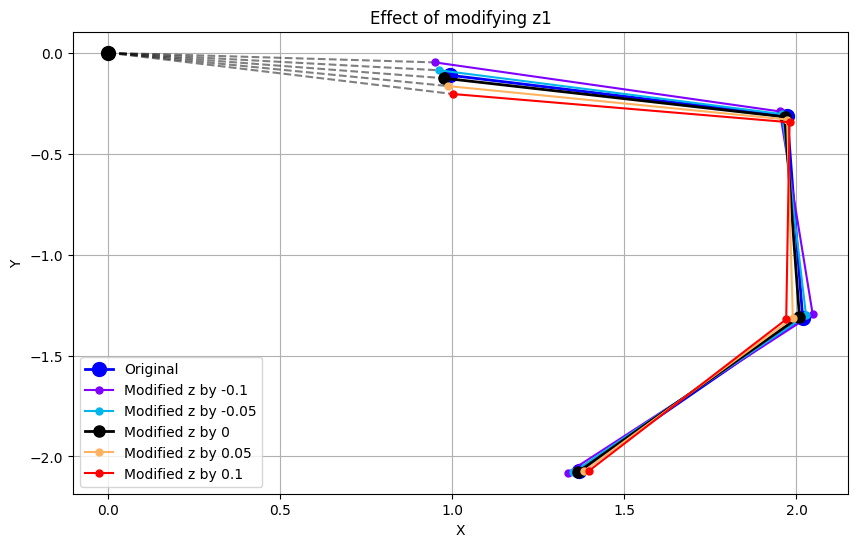

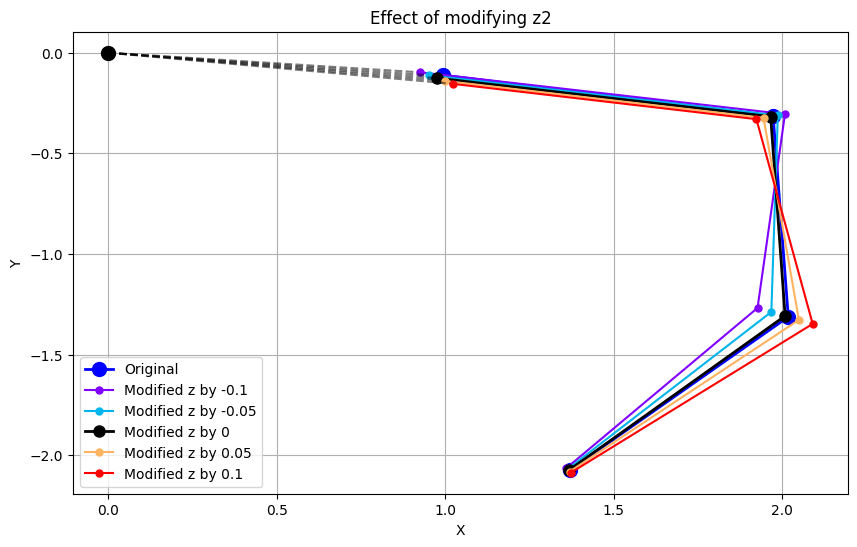

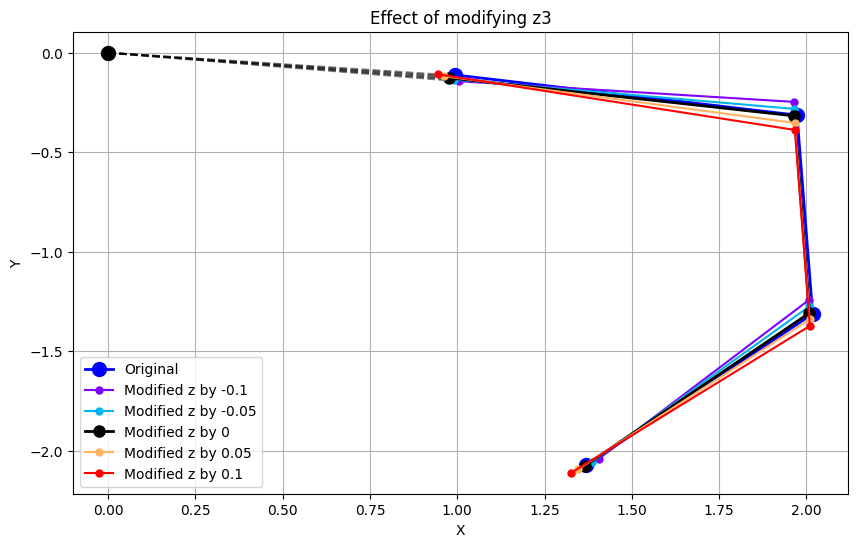

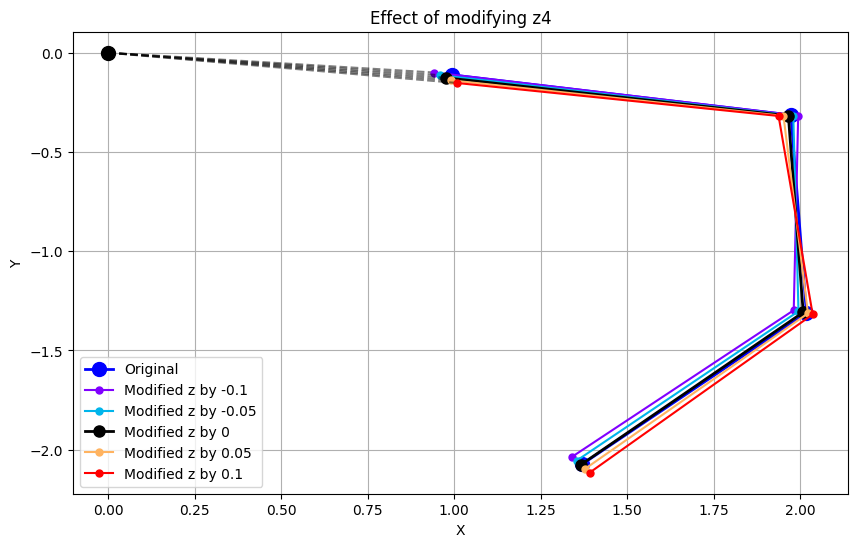

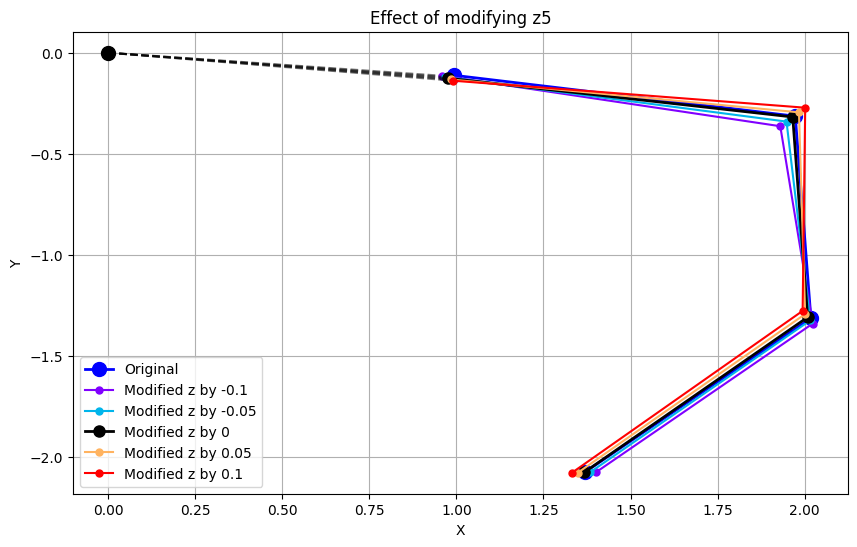

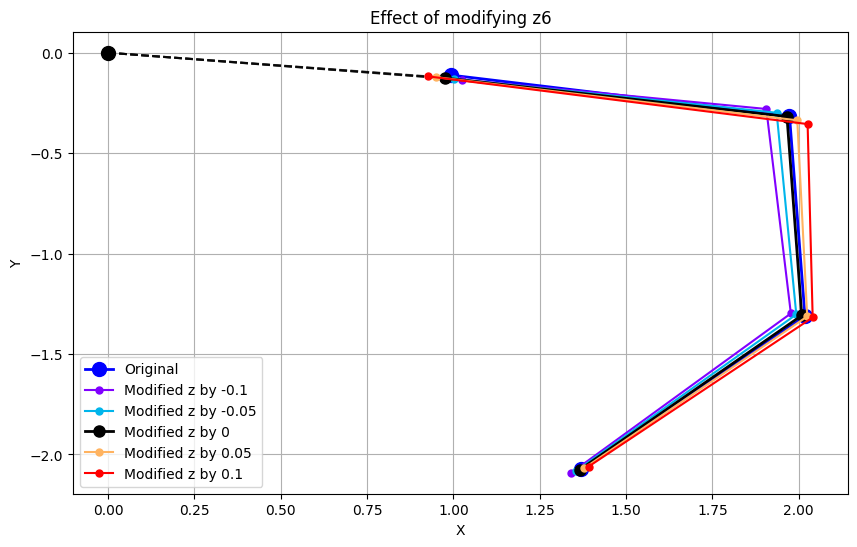

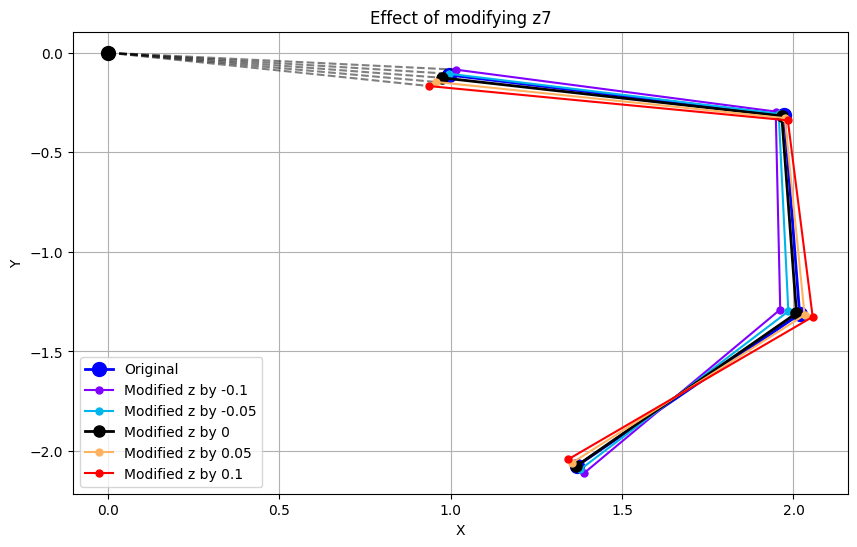

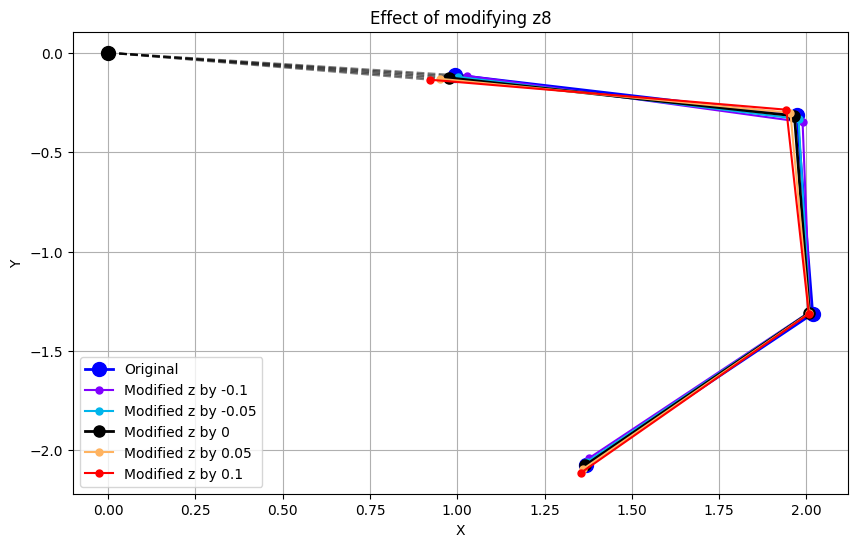

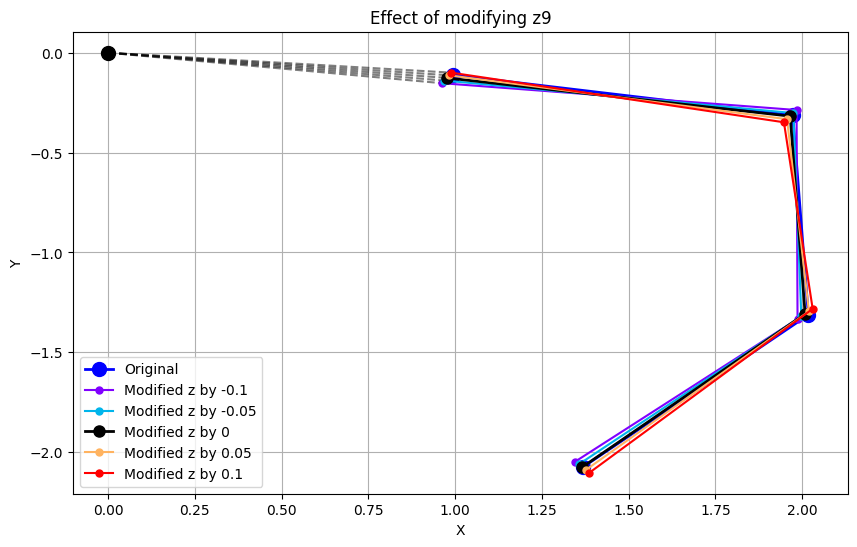

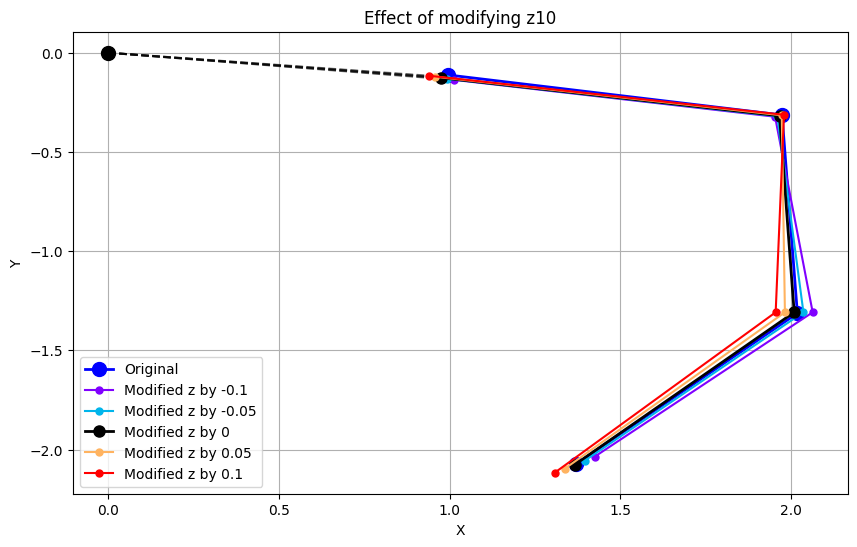

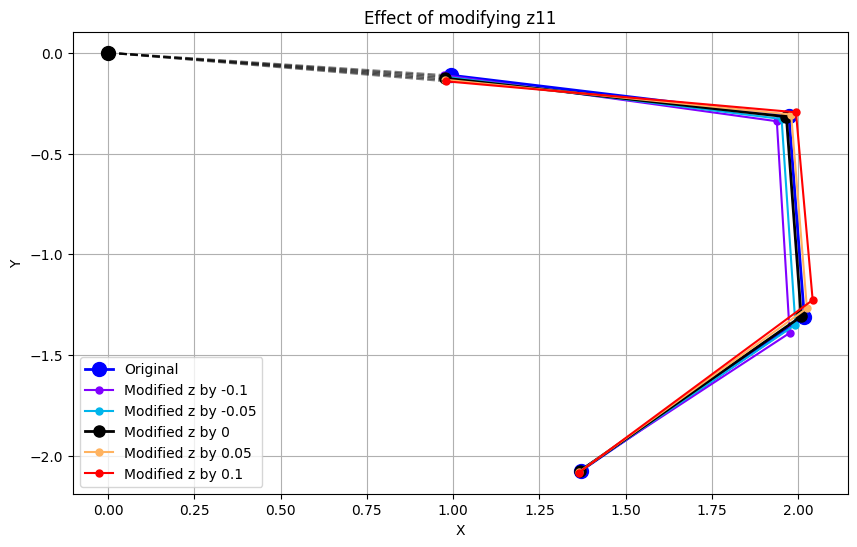

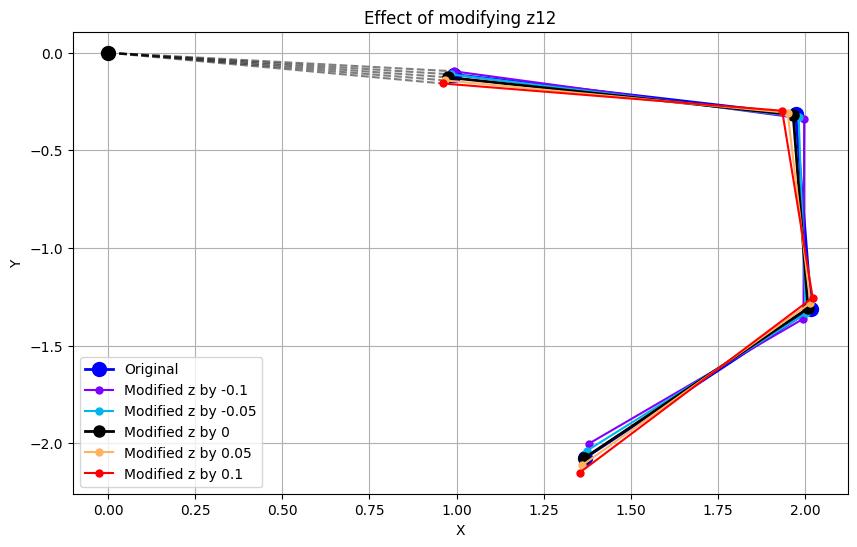

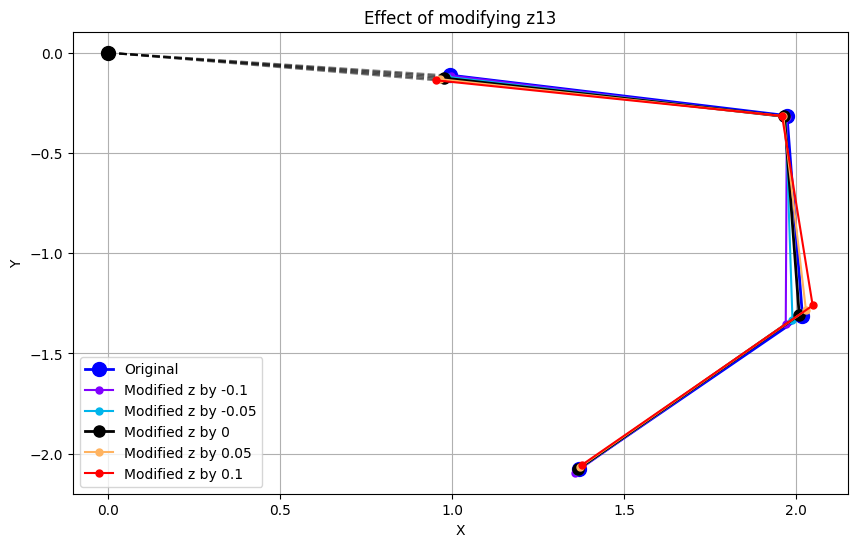

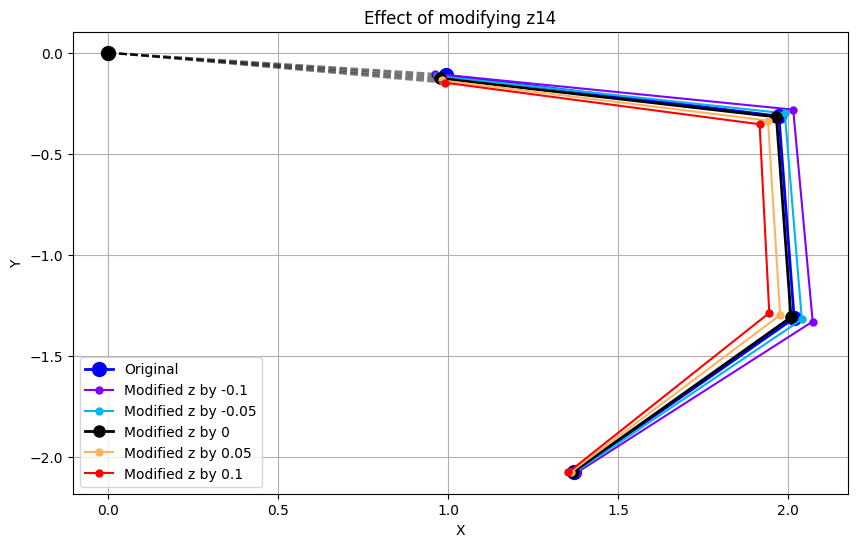

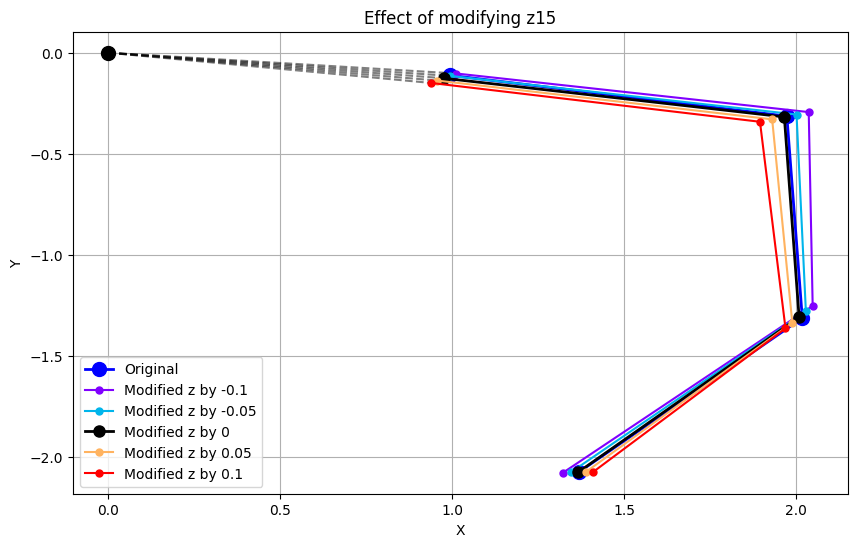

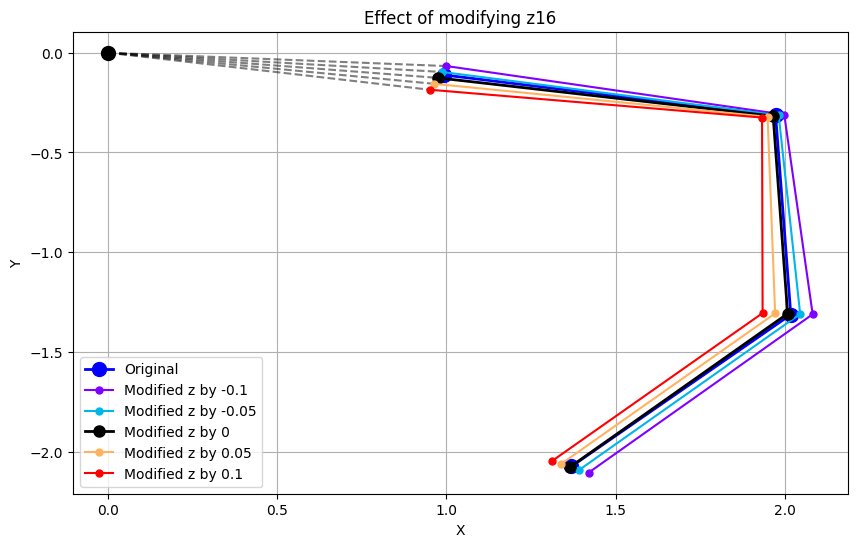

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Plot function
def plot_points(original, modified_points, values_to_add, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting the original points with bold blue line
    plt.plot(original[::2], original[1::2], 'bo-', label='Original', markersize=10, linewidth=2)
    
    # Starting point (0,0)
    plt.plot(0, 0, 'ko', markersize=10)  # Plots the point (0,0)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(modified_points)))
    for i, points in enumerate(modified_points):
        # Connect (0,0) to the first point of each set of modified points
        plt.plot([0, points[0]], [0, points[1]], 'k--', alpha=0.5)  # Dashed line to first point of each reconstruction
        
        # Adjust style based on whether the modification is zero
        if values_to_add[i] == 0.0:
            plt.plot(points[::2], points[1::2], 'o-', color='black', label='Modified z by 0', markersize=8, linewidth=2)
        else:
            plt.plot(points[::2], points[1::2], 'o-', color=colors[i], label=f'Modified z by {values_to_add[i]}', markersize=5)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Example usage
# # Assuming 'encoded' is a previously defined tensor with shape [1, z_dim] and 'input_point' is an array of coordinates
values_to_add = [-0.1, -0.05, 0.0, 0.05, 0.1]
for i in range(encoded.shape[1]):
    modified_points = []
    for val in values_to_add:
        modified_encoded = encoded.copy()
        modified_encoded[0, i] += val  # Change the latent variable
        modified_tensor = torch.tensor(modified_encoded, dtype=torch.float32)
        decoded = model.decoder(modified_tensor).detach().numpy()
        modified_points.append(decoded.flatten())
    plot_points(input_point, modified_points, values_to_add, f"Effect of modifying z{i+1}")

In [49]:
# import plotly.graph_objects as go
# import numpy as np
# import torch

# def interactive_latent_space_exploration(model, input_point, encoded):
#     z_dim = encoded.shape[1]
#     modifications = np.round(np.linspace(-0.5, 0.5, 11), 1)  # 11 options from -0.5 to 0.5 with step 0.1

#     def update_plot(zi, modification):
#         modified_encoded = encoded.clone().detach()
#         modified_encoded[0, zi] += modification
#         decoded = model.decoder(modified_encoded).detach().numpy().flatten()

#         traces = [
#             go.Scatter(x=input_point[::2], y=input_point[1::2], mode='lines+markers', 
#                        name='Original', line=dict(color='blue', width=3), marker=dict(size=10)),
#             go.Scatter(x=decoded[::2], y=decoded[1::2], mode='lines+markers', 
#                        name=f'Modified z{zi+1} by {modification:.1f}', 
#                        line=dict(color='red', width=2), marker=dict(size=8)),
#             go.Scatter(x=[0], y=[0], mode='markers', name='Start', 
#                        marker=dict(color='black', size=12, symbol='star')),
#             go.Scatter(x=[0, input_point[0]], y=[0, input_point[1]], mode='lines', 
#                        line=dict(color='blue', width=1, dash='dash'), showlegend=False),
#             go.Scatter(x=[0, decoded[0]], y=[0, decoded[1]], mode='lines', 
#                        line=dict(color='red', width=1, dash='dash'), showlegend=False)
#         ]
#         return traces

#     # Create the initial plot
#     fig = go.Figure(data=update_plot(0, 0.0))

#     # Precompute all decoded points
#     decoded_points = {}
#     for zi in range(z_dim):
#         for mod in modifications:
#             modified_encoded = encoded.clone().detach()
#             modified_encoded[0, zi] += mod
#             decoded = model.decoder(modified_encoded).detach().numpy().flatten()
#             decoded_points[(zi, mod)] = decoded.tolist()

#     # Create dropdown for zi selection
#     zi_dropdown = [
#         dict(
#             args=[{"visible": [True] * 5}],
#             label=f"z{i+1}",
#             method="update"
#         ) for i in range(z_dim)
#     ]

#     # Create dropdown for modification selection
#     mod_dropdown = [
#         dict(
#             args=[{"visible": [True] * 5}],
#             label=f"{val:.1f}",
#             method="update"
#         ) for val in modifications
#     ]

#     # Create update button
#     update_button = dict(
#         label="Update Plot",
#         method="update",
#         args=[{"visible": [True] * 5}]
#     )

#     fig.update_layout(
#         updatemenus=[
#             dict(
#                 buttons=zi_dropdown,
#                 direction="down",
#                 pad={"r": 10, "t": 10},
#                 showactive=True,
#                 x=0.1,
#                 xanchor="left",
#                 y=1.1,
#                 yanchor="top"
#             ),
#             dict(
#                 buttons=mod_dropdown,
#                 direction="down",
#                 pad={"r": 10, "t": 10},
#                 showactive=True,
#                 x=0.37,
#                 xanchor="left",
#                 y=1.1,
#                 yanchor="top"
#             ),
#             dict(
#                 buttons=[update_button],
#                 direction="left",
#                 pad={"r": 10, "t": 10},
#                 showactive=True,
#                 x=0.65,
#                 xanchor="left",
#                 y=1.1,
#                 yanchor="top"
#             )
#         ]
#     )

#     fig.update_layout(
#         title='Effect of modifying z1 by 0.0',
#         xaxis_title="X",
#         yaxis_title="Y",
#         legend_title="Configurations",
#         width=800,
#         height=600
#     )

#     fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='black', showgrid=True)
#     fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='black', showgrid=True)

#     # Add a custom function to handle button click
#     fig.add_annotation(
#         text="",
#         xref="paper",
#         yref="paper",
#         showarrow=False,
#         font=dict(size=1),
#         visible=True,
#         source="""
#         function(gd) {
#             var zi = gd.layout.updatemenus[0].active;
#             var mod_index = gd.layout.updatemenus[1].active;
#             var mods = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5];
#             var mod = mods[mod_index];
#             var decoded = gd._fullData[5].customdata[zi][mod_index];
#             var input_point = gd._fullData[5].customdata[z_dim];
#             Plotly.restyle(gd, {
#                 'x': [input_point.slice(0, 8, 2), decoded.slice(0, 8, 2), [0], [0, input_point[0]], [0, decoded[0]]],
#                 'y': [input_point.slice(1, 8, 2), decoded.slice(1, 8, 2), [0], [0, input_point[1]], [0, decoded[1]]]
#             });
#             Plotly.relayout(gd, {title: 'Effect of modifying z' + (zi+1) + ' by ' + mod.toFixed(1)});
#         }
#         """
#     )

#     # Add the precomputed points and input_point to the figure's custom data
#     fig.add_trace(go.Scatter(x=[None], y=[None], customdata=[decoded_points, input_point.tolist()], visible=False))

#     fig.show()

# # Example usage
# interactive_latent_space_exploration(model, input_point, encoded)

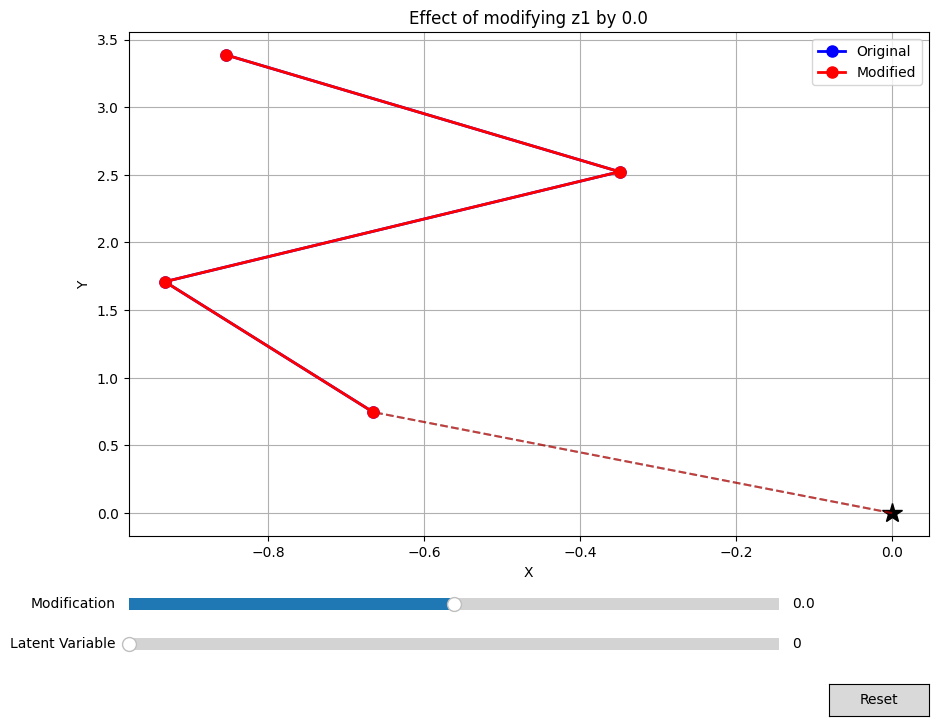

In [25]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np
import torch

def interactive_latent_space_exploration(model, input_point, encoded):
    z_dim = encoded.shape[1]
    modifications = np.round(np.linspace(-0.5, 0.5, 11), 1)

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(left=0.1, bottom=0.25)

    # Plot original configuration
    line_original, = ax.plot(input_point[::2], input_point[1::2], 'bo-', label='Original', linewidth=2, markersize=8)
    point_start = ax.plot(0, 0, 'k*', markersize=15)[0]
    line_start_original, = ax.plot([0, input_point[0]], [0, input_point[1]], 'k--', alpha=0.5)

    # Plot modified configuration (initially same as original)
    line_modified, = ax.plot(input_point[::2], input_point[1::2], 'ro-', label='Modified', linewidth=2, markersize=8)
    line_start_modified, = ax.plot([0, input_point[0]], [0, input_point[1]], 'r--', alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Effect of modifying z1 by 0.0')
    ax.legend()
    ax.grid(True)

    # Create sliders
    ax_zi = plt.axes([0.1, 0.1, 0.65, 0.03])
    ax_mod = plt.axes([0.1, 0.15, 0.65, 0.03])

    slider_zi = Slider(ax_zi, 'Latent Variable', 0, z_dim-1, valinit=0, valstep=1)
    slider_mod = Slider(ax_mod, 'Modification', -0.5, 0.5, valinit=0.0, valstep=0.1)

    def update(val):
        zi = int(slider_zi.val)
        modification = slider_mod.val

        modified_encoded = encoded.clone().detach()
        modified_encoded[0, zi] += modification
        decoded = model.decoder(modified_encoded).detach().numpy().flatten()

        line_modified.set_xdata(decoded[::2])
        line_modified.set_ydata(decoded[1::2])
        line_start_modified.set_xdata([0, decoded[0]])
        line_start_modified.set_ydata([0, decoded[1]])

        ax.set_title(f'Effect of modifying z{zi+1} by {modification:.1f}')
        fig.canvas.draw_idle()

    slider_zi.on_changed(update)
    slider_mod.on_changed(update)

    # Create a reset button
    ax_reset = plt.axes([0.8, 0.025, 0.1, 0.04])
    button_reset = Button(ax_reset, 'Reset')

    def reset(event):
        slider_zi.reset()
        slider_mod.reset()

    button_reset.on_clicked(reset)

    plt.show()

# Example usage
interactive_latent_space_exploration(model, input_point, encoded)

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import torch

def interactive_latent_space_exploration(model, input_point, encoded):
    z_dim = encoded.shape[1]
    modifications = np.round(np.linspace(-0.5, 0.5, 11), 1)  # 11 options from -0.5 to 0.5 with step 0.1

    def update_plot(zi, modification_index):
        modification = modifications[modification_index]
        modified_encoded = encoded.clone().detach()
        modified_encoded[0, zi] += modification
        decoded = model.decoder(modified_encoded).detach().numpy().flatten()

        # Original points
        trace_original = go.Scatter(x=input_point[::2], y=input_point[1::2], mode='lines+markers', 
                                    name='Original', line=dict(color='blue', width=3), marker=dict(size=10))

        # Modified points
        trace_modified = go.Scatter(x=decoded[::2], y=decoded[1::2], mode='lines+markers', 
                                    name=f'Modified z{zi+1} by {modification:.1f}', 
                                    line=dict(color='red', width=2), marker=dict(size=8))

        # Starting point (0,0)
        trace_start = go.Scatter(x=[0], y=[0], mode='markers', name='Start', 
                                 marker=dict(color='black', size=12, symbol='star'))

        # Dashed lines from (0,0) to first points
        trace_dashed_original = go.Scatter(x=[0, input_point[0]], y=[0, input_point[1]], mode='lines', 
                                           line=dict(color='blue', width=1, dash='dash'), showlegend=False)
        trace_dashed_modified = go.Scatter(x=[0, decoded[0]], y=[0, decoded[1]], mode='lines', 
                                           line=dict(color='red', width=1, dash='dash'), showlegend=False)

        fig = go.Figure()
        fig.add_trace(trace_original)
        fig.add_trace(trace_modified)
        fig.add_trace(trace_start)
        fig.add_trace(trace_dashed_original)
        fig.add_trace(trace_dashed_modified)

        fig.update_layout(title=f"Effect of modifying z{zi+1} by {modification:.1f}",
                          xaxis_title="X", yaxis_title="Y",
                          legend_title="Configurations",
                          width=800, height=600)

        fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='black', showgrid=True)
        fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='black', showgrid=True)

        return fig

    # Create the initial plot
    fig = update_plot(0, 5)  # Start with z1 and modification 0.0

    # Add sliders
    fig.update_layout(
        sliders=[
            dict(
                active=0,
                currentvalue={"prefix": "Latent Variable: z"},
                pad={"t": 50},
                steps=[
                    {"label": f"z{i+1}", 
                     "method": "animate", 
                     "args": [[f"frame_z{i+1}_m0.0"], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}]
                    } for i in range(z_dim)
                ]
            ),
            dict(
                active=5,
                currentvalue={"prefix": "Modification: "},
                pad={"t": 100},
                steps=[
                    {"label": f"{val:.1f}", 
                     "method": "animate", 
                     "args": [[f"frame_z1_m{val:.1f}"], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}]
                    } for val in modifications
                ]
            )
        ]
    )

    # Add frames for all combinations
    frames = [go.Frame(data=update_plot(zi, mi).data, 
                       name=f"frame_z{zi+1}_m{modifications[mi]:.1f}")
              for zi in range(z_dim) for mi in range(len(modifications))]
    fig.frames = frames

    fig.show()
    

# Example usage
interactive_latent_space_exploration(model, input_point, encoded)

interactive(children=(IntSlider(value=0, description='zi:', max=15), FloatSlider(value=0.0, description='Value…

Calling interactive_latent_space_exploration
Starting interactive_latent_space_exploration
Latent space dimension: 16
Displaying widgets


Showing initial plot
Function completed
Call completed


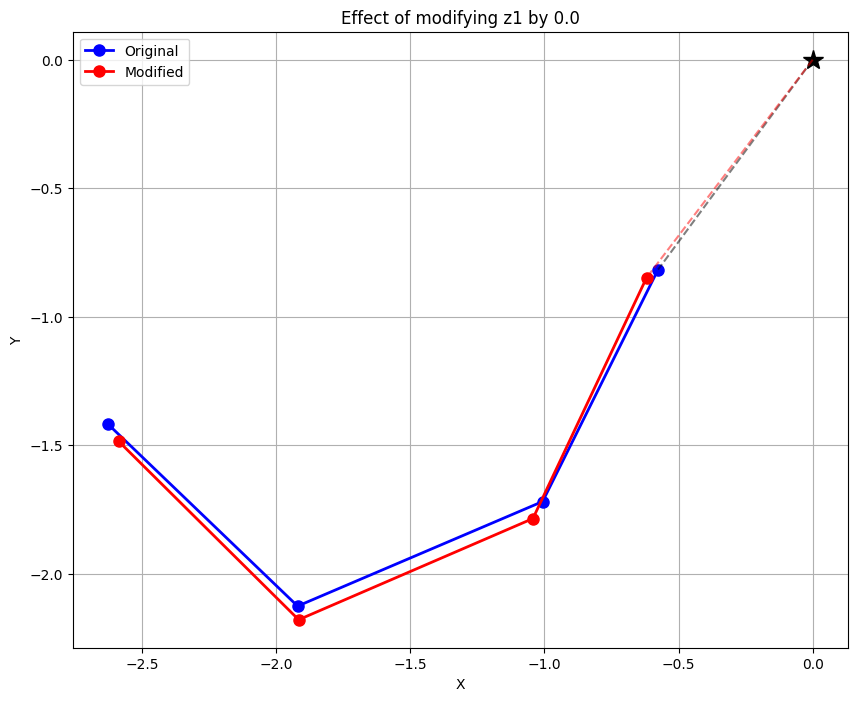

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

import torch

def plot_latent_space(model, input_point, encoded, zi, modification):
    print("Entering plot_latent_space function")
    fig, ax = plt.subplots(figsize=(10, 8))
    print("Figure created")

    # Original configuration
    ax.plot(input_point[::2], input_point[1::2], 'bo-', label='Original', linewidth=2, markersize=8)
    ax.plot(0, 0, 'k*', markersize=15)
    ax.plot([0, input_point[0]], [0, input_point[1]], 'k--', alpha=0.5)
    print("Original configuration plotted")

    # Modified configuration
    print("Modifying encoded tensor")
    modified_encoded = encoded.clone().detach()
    modified_encoded[0, zi] += modification
    print("Running decoder")
    decoded = model.decoder(modified_encoded).detach().numpy().flatten()
    print("Decoder output shape:", decoded.shape)
    
    ax.plot(decoded[::2], decoded[1::2], 'ro-', label='Modified', linewidth=2, markersize=8)
    ax.plot([0, decoded[0]], [0, decoded[1]], 'r--', alpha=0.5)
    print("Modified configuration plotted")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Effect of modifying z{zi+1} by {modification:.1f}')
    ax.legend()
    ax.grid(True)
    print("Plot styling completed")

    print("Attempting to display plot")

    print("plt.show() called")

def interactive_latent_space_exploration(model, input_point, encoded):
    print("Starting interactive_latent_space_exploration")
    z_dim = encoded.shape[1]
    print(f"Latent space dimension: {z_dim}")

    zi_widget = widgets.IntText(value=0, description='Latent Variable:', min=0, max=z_dim-1)
    mod_widget = widgets.FloatText(value=0.0, description='Modification:', step=0.1)
    update_button = widgets.Button(description="Update Plot")
    
    output = widgets.Output()

    def on_button_clicked(b):
        print("Update button clicked")
        with output:
            clear_output(wait=True)
            print(f"Updating plot with zi={zi_widget.value}, modification={mod_widget.value}")
            plot_latent_space(model, input_point, encoded, zi_widget.value, mod_widget.value)

    update_button.on_click(on_button_clicked)

    print("Displaying widgets")
    display(widgets.VBox([zi_widget, mod_widget, update_button, output]))
    
    # Show initial plot
    print("Showing initial plot")
    with output:
        plot_latent_space(model, input_point, encoded, 0, 0.0)

    print("Function completed")

# Example usage
print("Calling interactive_latent_space_exploration")
interactive_latent_space_exploration(model, input_point, encoded)
print("Call completed")

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def bin_slider(bin=0):
    print("Selected value: ", bin)

interact(bin_slider, bin=widgets.IntSlider(min=0, max=50, step=1, value=0))

interactive(children=(IntSlider(value=0, description='bin', max=50), Output()), _dom_classes=('widget-interact…

<function __main__.bin_slider(bin=0)>

In [32]:
from ipywidgets import interact
import ipywidgets as widgets

def bin_slider(bin=0):
    return bin

interact(bin_slider, bin=widgets.IntSlider(min=0, max=50, step=1, value=0))

interactive(children=(IntSlider(value=0, description='bin', max=50), Output()), _dom_classes=('widget-interact…

<function __main__.bin_slider(bin=0)>

In [30]:
!jupyter lab clean

The system cannot find the path specified.
[LabCleanApp] Cleaning C:\Users\User\AppData\Local\Programs\Python\Python311\share\jupyter\lab...
[LabCleanApp] staging not present, skipping...
[LabCleanApp] Success!


In [31]:
!jupyter labextension install

The system cannot find the path specified.
(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyterlab\debuglog.py:57: UserWarning: ValueError: Please install nodejs >=18.0.0 before continuing. nodejs may be installed using conda or directly from the nodejs website.
  warnings.warn(msg[-1].strip())
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\jupyterlab\debuglog.py:58: UserWarning: See the log file for details: C:\Users\User\AppData\Local\Temp\

In [14]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import torch

def interactive_latent_space_exploration(model, input_point, encoded):
    z_dim = encoded.shape[1]
    modifications = np.round(np.linspace(-0.5, 0.5, 11), 1)

    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot original configuration
    line_original, = ax.plot(input_point[::2], input_point[1::2], 'bo-', label='Original', linewidth=2, markersize=8)
    point_start = ax.plot(0, 0, 'k*', markersize=15)[0]
    line_start_original, = ax.plot([0, input_point[0]], [0, input_point[1]], 'k--', alpha=0.5)

    # Plot modified configuration (initially same as original)
    line_modified, = ax.plot(input_point[::2], input_point[1::2], 'ro-', label='Modified', linewidth=2, markersize=8)
    line_start_modified, = ax.plot([0, input_point[0]], [0, input_point[1]], 'r--', alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Effect of modifying z1 by 0.0')
    ax.legend()
    ax.grid(True)

    plt.close()  # Prevent duplicate display of figure

    # Create widgets
    slider_zi = widgets.IntSlider(value=0, min=0, max=z_dim-1, step=1, description='Latent Variable:')
    slider_mod = widgets.FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.1, description='Modification:')
    button_update = widgets.Button(description="Update")
    button_reset = widgets.Button(description="Reset")
    output = widgets.Output()

    def update(b):
        with output:
            output.clear_output(wait=True)
            zi = slider_zi.value
            modification = slider_mod.value

            modified_encoded = encoded.clone().detach()
            modified_encoded[0, zi] += modification
            decoded = model.decoder(modified_encoded).detach().numpy().flatten()

            line_modified.set_xdata(decoded[::2])
            line_modified.set_ydata(decoded[1::2])
            line_start_modified.set_xdata([0, decoded[0]])
            line_start_modified.set_ydata([0, decoded[1]])

            ax.set_title(f'Effect of modifying z{zi+1} by {modification:.1f}')
            display(fig)

    def reset(b):
        slider_zi.value = 0
        slider_mod.value = 0.0
        update(None)

    button_update.on_click(update)
    button_reset.on_click(reset)

    # Display widgets and initial plot
    display(widgets.VBox([slider_zi, slider_mod, widgets.HBox([button_update, button_reset])]))
    display(output)
    update(None)

# Example usage
interactive_latent_space_exploration(model, input_point, encoded)

Output()

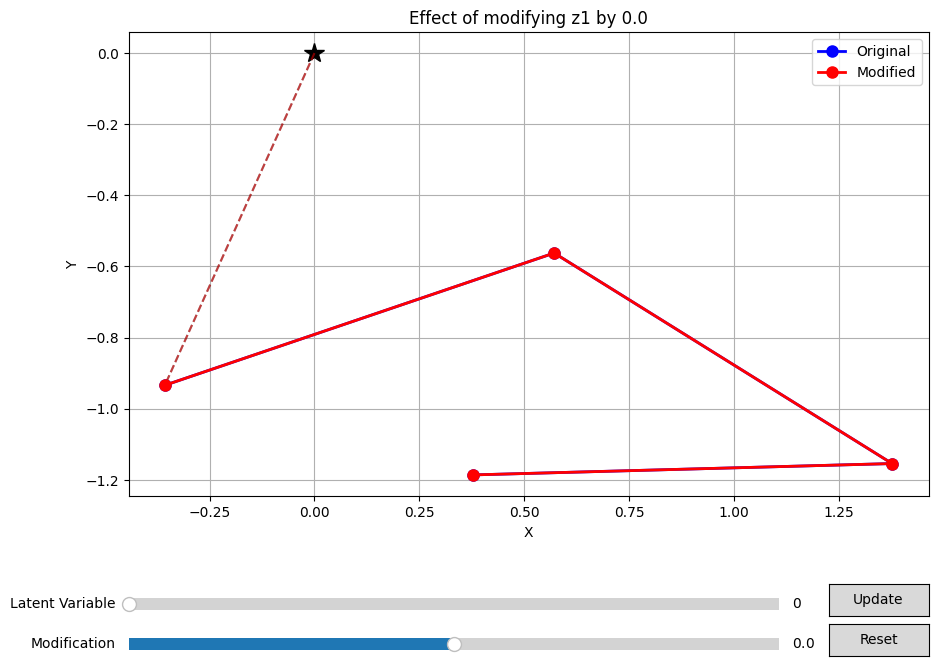

In [12]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np
import torch

def interactive_latent_space_exploration(model, input_point, encoded):
    z_dim = encoded.shape[1]
    modifications = np.round(np.linspace(-0.5, 0.5, 11), 1)

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(left=0.1, bottom=0.3)

    # Plot original configuration
    line_original, = ax.plot(input_point[::2], input_point[1::2], 'bo-', label='Original', linewidth=2, markersize=8)
    point_start = ax.plot(0, 0, 'k*', markersize=15)[0]
    line_start_original, = ax.plot([0, input_point[0]], [0, input_point[1]], 'k--', alpha=0.5)

    # Plot modified configuration (initially same as original)
    line_modified, = ax.plot(input_point[::2], input_point[1::2], 'ro-', label='Modified', linewidth=2, markersize=8)
    line_start_modified, = ax.plot([0, input_point[0]], [0, input_point[1]], 'r--', alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Effect of modifying z1 by 0.0')
    ax.legend()
    ax.grid(True)

    # Create sliders
    ax_zi = plt.axes([0.1, 0.15, 0.65, 0.03])
    ax_mod = plt.axes([0.1, 0.1, 0.65, 0.03])

    slider_zi = Slider(ax_zi, 'Latent Variable', 0, z_dim-1, valinit=0, valstep=1)
    slider_mod = Slider(ax_mod, 'Modification', -0.5, 0.5, valinit=0.0, valstep=0.1)

    # Create an update button
    ax_update = plt.axes([0.8, 0.15, 0.1, 0.04])
    button_update = Button(ax_update, 'Update')

    def update(event):
        zi = int(slider_zi.val)
        modification = slider_mod.val

        modified_encoded = encoded.clone().detach()
        modified_encoded[0, zi] += modification
        decoded = model.decoder(modified_encoded).detach().numpy().flatten()

        line_modified.set_xdata(decoded[::2])
        line_modified.set_ydata(decoded[1::2])
        line_start_modified.set_xdata([0, decoded[0]])
        line_start_modified.set_ydata([0, decoded[1]])

        ax.set_title(f'Effect of modifying z{zi+1} by {modification:.1f}')
        fig.canvas.draw_idle()

    button_update.on_clicked(update)

    # Create a reset button
    ax_reset = plt.axes([0.8, 0.1, 0.1, 0.04])
    button_reset = Button(ax_reset, 'Reset')

    def reset(event):
        slider_zi.reset()
        slider_mod.reset()
        update(event)

    button_reset.on_clicked(reset)

    plt.show()

# Example usage
interactive_latent_space_exploration(model, input_point, encoded)

In [33]:

encoded = model.encoder(input_tensor)
decoded_points= model.decoder(encoded).detach().numpy()

In [34]:
decoded_points

array([[ 0.9274551 ,  0.19366011,  1.9143482 , -0.06271583,  1.8809922 ,
        -1.0694901 ,  0.9574135 , -1.410801  ]], dtype=float32)

In [38]:
decoded_points.squeeze().shape

(8,)

In [39]:
import numpy as np

# List of 8 values representing the coordinates x11, x12, x21, x22, x31, x32, x41, x42
decoded_points= model.decoder(encoded).squeeze().detach().numpy()

# Convert the list into numpy arrays for the points
x1 = np.array(decoded_points[0:2])
x2 = np.array(decoded_points[2:4])
x3 = np.array(decoded_points[4:6])
x4 = np.array(decoded_points[6:8])

# Function to calculate the angle between two vectors
def angle_between(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    angle_radians = np.arccos(dot_product / (magnitude_v1 * magnitude_v2))
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

# Calculate vectors from points
v1 = x1 - np.array([0, 0])  # From origin to x1
v2 = x2 - x1               # From x1 to x2
v3 = x3 - x2               # From x2 to x3
v4 = x4 - x3               # From x3 to x4

# Calculate angles between vectors
angle1 = angle_between(v1, v2)
angle2 = angle_between(v2, v3)
angle3 = angle_between(v3, v4)

# Print angles
print("Angle between (0,0)-x1 and x1-x2: {:.2f} degrees".format(angle1))
print("Angle between x1-x2 and x2-x3: {:.2f} degrees".format(angle2))
print("Angle between x2-x3 and x3-x4: {:.2f} degrees".format(angle3))

Angle between (0,0)-x1 and x1-x2: 26.36 degrees
Angle between x1-x2 and x2-x3: 77.34 degrees
Angle between x2-x3 and x3-x4: 67.82 degrees


In [41]:
import math
import numpy as np
import pandas as pd

def calculate_angle(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitudes = np.linalg.norm(v1) * np.linalg.norm(v2)
    cos_angle = dot_product / magnitudes
    angle = math.acos(min(1, max(-1, cos_angle)))  # Ensure the value is within [-1, 1]
    return math.degrees(angle)

def generate_angle_table(decoded_points):
    # Reshape the list into 4 points
    points = np.array(decoded_points).reshape(4, 2)
    
    angles = []
    
    # Calculate vector from (0,0) to x1
    v0 = points[0]
    
    for i in range(3):
        v1 = points[i+1] - points[i]
        angle = calculate_angle(v0, v1)
        angles.append(angle)
        v0 = v1
    
    # Create a pandas DataFrame
    df = pd.DataFrame({
        'Line Pair': ['(0,0)-x1 and x1-x2', 'x1-x2 and x2-x3', 'x2-x3 and x3-x4'],
        'Angle (degrees)': angles
    })
    
    return df

# Example usage
decoded_points = model.decoder(encoded).squeeze().detach().numpy()
result_table = generate_angle_table(decoded_points)
print(result_table)

            Line Pair  Angle (degrees)
0  (0,0)-x1 and x1-x2        26.356807
1     x1-x2 and x2-x3        77.335154
2     x2-x3 and x3-x4        67.820464


NameError: name 'encode' is not defined